In [2]:
!pip install scipy

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.6 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 811.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   ---------------------------------------- 0.2/45.9 MB 7.4 MB/s eta 0:00:07
   ---------------------------------------- 0.5/45.9 MB 6.2 MB/s eta 0:00:08
    --------------------------------------- 0.7/45.9 MB 6.6 MB/s eta 0:00:07
    --------------------------------------- 1.0/45.9 MB 6.2 MB/s eta 0:00:08
   - -------------------------------------- 1.2/45.9 MB 6.5 MB/s eta 0:00:07
   - -------------------------------------- 1.5/45.9 MB 6.2 MB/s eta 0:00:08
   - -------------------------------------- 1.7/45.9 MB 5.9 MB/s eta 0:00:08
   - -------------------------------------- 1.9/45.9 MB 6.1 MB/s eta 0:00:08
   - -------------------------------------- 2.2/45.9 MB 6.0 MB/s eta 0:00:08
   --

In [3]:
import numpy as np
import scipy.fftpack as fourier
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves
import winsound

In [86]:
x_n = [0, 1, 2, 3, 4] # Definimos una función en tiempo discreto
x_fft = fourier.fft(x_n) # Calculamos la FFT
x_fft

array([10. -0.j        , -2.5+3.4409548j , -2.5+0.81229924j,
       -2.5-0.81229924j, -2.5-3.4409548j ])

In [87]:
M_x_fft = abs(x_fft)                   # Calculamos la Magnitud de la FFT
Ph_x_fft = np.angle(x_fft)             # Calculamos la Fase de la FFT
print('Magnitud: ', M_x_fft)
print('Angle: ',Ph_x_fft*180/np.pi)

Magnitud:  [10.          4.25325404  2.62865556  2.62865556  4.25325404]
Angle:  [  -0.  126.  162. -162. -126.]


1000


Text(0, 0.5, 'Amplitud')

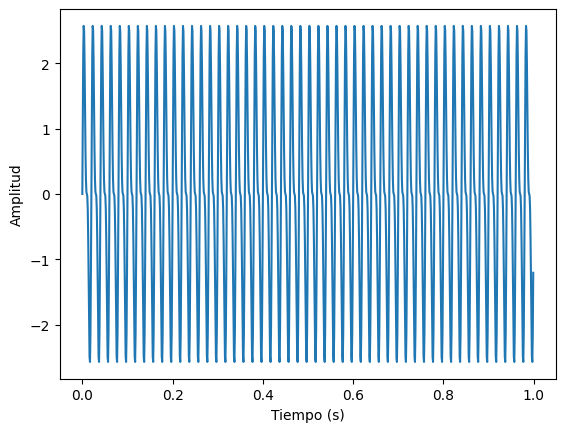

In [99]:
# Definimos los parámetros de la señal
Ts = 0.001                                       
Fs=1/Ts

# Definimos una frecuencia de 50 Hz para la señal 1
w1 = 2*np.pi*50                                  

# Definimos una frecuencia de 100 Hz para la señal 2
w2 = 2*np.pi*100                               

#Definimos el vector de muestras
n = np.arange(0, 1,Ts)
print(len(n))

# Construimos una señal compuesta por la señal 1 y 2

senal = 2*np.sin(w1*n)+np.sin(w2*n)       

#Graficamos la señal
plt.plot(n,senal)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

Text(0, 0.5, 'Amplitud FFT')

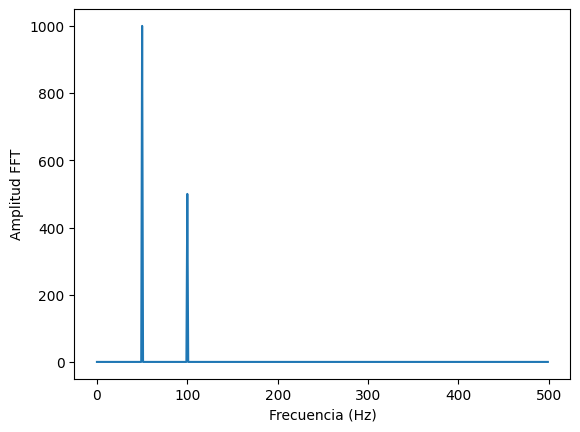

In [100]:
# Calculamos la FFT de la señal
senal_fft = fourier.fft(senal)                            

# Calculamos la Magnitud de la FFT
M_senal_fft = abs(senal_fft) 
# Tomamos la mitad de los datos (recordar la simetría de la transformada)
M_senal_fft = M_senal_fft[0:len(senal)//2]

# Definimos el Vector de Frecuencias
F = np.arange(0, len(senal)/2) 

#Graficamos el espectro de frecuencias de la señal
plt.plot(F, M_senal_fft)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud FFT')


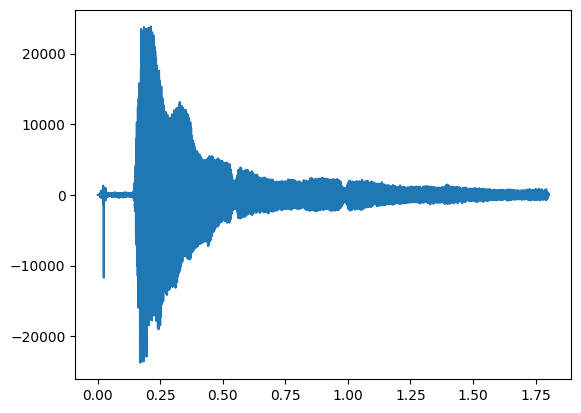

In [84]:
filename='rec_MI.wav'                                
# Reproducimos el sonido que vamos a cargar
winsound.PlaySound(filename, winsound.SND_FILENAME)   

# Leemos el archivo de audio del directorio y almacenamos los datos en la variable Audio_m
Fs, data = waves.read(filename)                       
Audio_m = data[:,0]              

# Definimos un vector de tiempo de la misma longitud de la señal
L = len(Audio_m)                                      
n = np.arange(0,L)/Fs                                 

plt.plot(n,Audio_m)

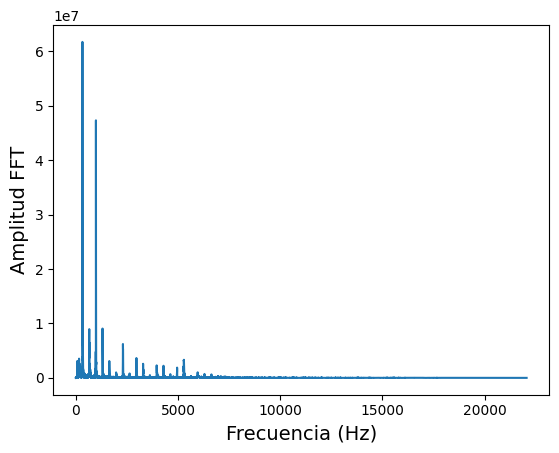

In [85]:
# Calculamos la FFt de la señal de audio
audio_fft = fourier.fft(Audio_m)                        

# Tomamos la Magnitud de la FFT
M_audio_fft = abs(audio_fft)
# Tomamos la mitad de los datos (recordar la simetría de la transformada)
M_audio_fft = M_audio_fft[0:L//2]                              

Ph_audio_fft = np.angle(audio_fft)
F = Fs*np.arange(0, L//2)/L

plt.plot(F, M_audio_fft)
plt.xlabel('Frecuencia (Hz)', fontsize='14')
plt.ylabel('Amplitud FFT', fontsize='14')
plt.show()

In [79]:
Posm = np.where(M_audio_fft == np.max(M_audio_fft))           # Encontramos la posición para la cual la Magnitud de FFT es máxima
F_fund = F[Posm]                                # Identificamos la Frecuencia asociada al valor del máximo de la Magnitud de FFT

if F_fund > 135 and F_fund < 155:                   # Rango de frecuencias para nota RE
    print("La nota es RE, con frecuencia: ",F_fund)
elif F_fund > 190 and F_fund < 210:                   # Rango de frecuencias para nota SOL
    print("La nota es SOL, con frecuencia: ",F_fund)
elif F_fund > 235 and F_fund < 255:                     # Rango de frecuencias para nota SI
    print("La nota es SI, con frecuencia: ",F_fund)
elif F_fund > 320 and F_fund < 340:                   # Rango de frecuencias para nota MI
    print("La nota es MI, con frecuencia: ",F_fund)

La nota es MI, con frecuencia:  [328.99682971]
